In [1]:
using Plots, ComplexPhasePortrait, ApproxFun
gr();

$$
\def\E{{\rm e}}
$$

# M3M6: Methods of Mathematical Physics

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: Blackboard



# Lecture 6: Analytic functions at infinity


This lecture we cover

1. Riemann sphere and analyticity at infinity
     - Cauchy's integral formula exterior to a contour
     - Exterior Residue theorem 
2. Reperesenting functions by their behaviour near singularities
     - Application: Partial fraction expansion



## Riemann sphere and analyticity at infinity

**Definition (Riemann sphere)** The _Riemann sphere_ is the compactification of ${\mathbb C}$:
$$
    \bar {\mathbb C} = {\mathbb C} \cup \{\infty\}
$$

Without delving on the details, we can define an open set $D \subset \bar{\mathbb C}$ on the Riemann sphere, where $\infty \in D$ implies that there exists an $R$ such that $\{ z : |z| > R\} \subset D$.


**Definition (Analytic at infinity)** A function $f(z)$ defined on an open set $D \subset \bar {\mathbb C}$ such that $\infty \in D$ is _analytic at ∞_ if $f(z^{-1})$ is analytic at zero.

**Proposition (Taylor series at infinity)** If $f$ is analytic at infinity, then there exists an $R$ such that for all $|z| > R$ we have
$$
f(z) = \sum_{k=-\infty}^0 f_k z^k 
$$
The coefficients $f_k$ are defined by
$$
f_k = {1 \over 2 \pi i} \oint_\gamma {f(z) \over z^{k+1}} dz
$$
where $\gamma$ is any simple closed positively oriented contour such that $f$ is analytic outside of.

_Demonstration_ $f(z) = \E^{1/z}$ is not analytic at zero, but is analytic at infinity because $f(1/z) = \E^z$ is analytic at zero:

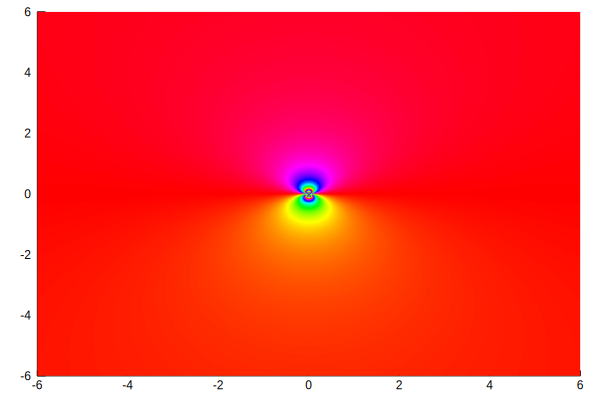

In [2]:
f = z -> exp(1/z)
phaseplot(-6..6, -6..6, f)

We therefore have a convergence "Taylor" series in inverse powers of $z$:
$$
\E^{1/z} = 1 + {1 \over z} + {1 \over 2 z^2} + {1 \over 3! z^3} + \cdots
$$

In [6]:
z = 2.0+2im
sum([z^k/factorial(-1.0k) for k=-100:0]) - exp(1/z)

2.220446049250313e-16 - 5.551115123125783e-17im

These coefficients can be calculated as integrals:

In [7]:
k=-5;
sum(Fun(z -> f(z)/z^(k+1), Circle()))/(2π*im) - 1/factorial(-1.0k)

-3.4867941867133823e-16 + 1.13303848301229e-16im

**Theorem (Cauchy's integral theorem near infinity)** Suppose $f$ is analytic outside and on a positively oriented, simple, closed contour $\gamma$, and 
$$f(\infty) = 0.$$ 
Then we have
$$
f(z) = -{1 \over 2 \pi i} \oint {f(\zeta) \over \zeta - z} d \zeta
$$

*Example* The function $f(z) = \E^{1/z} - 1$ vanishes at $\infty$ and so can thence be recovered as a Cauchy integral:

In [8]:
f = z -> exp(1/z) - 1

ζ = Fun(Circle())
-sum(f.(ζ)/(ζ-z))/(2π*im) - f(z)

2.220446049250313e-16 + 5.551115123125783e-17im

The decay at infinity is required:

In [143]:
f = z -> exp(1/z) 

ζ = Fun(Circle())
-sum(f.(ζ)/(ζ-z))/(2π*im) - f(z)

-0.9999999999999997 + 5.551115123125783e-17im



### Exterior Residue theorem

**Definition (Residue at infinity)** Suppose $f$ is analytic in the annulus $A_{R\infty} = \{z : R < |z| < \infty \}$. Then the residue at infinity is
$$
{\underset{z = \infty}{\rm Res}} \, f(z) = -f_{-1}
$$
where $f_{-1}$ is (again) the Laurent coefficient for any circle in $A_{R\infty}$.

**Theorem (Exterier Residue Theorem)** Let $f$ be holomprohic outside and on a simple closed, positively oriented contour $\gamma$ except at isolated points $z_1, \ldots, z_r$ outside $\gamma$. Then

$$\oint_\gamma f(z) dz = -2 \pi i \sum_{j=1}^r {\underset{z = z_j}{\rm Res}}\, f(z)$$ 


Let's return to our simple examples from before:

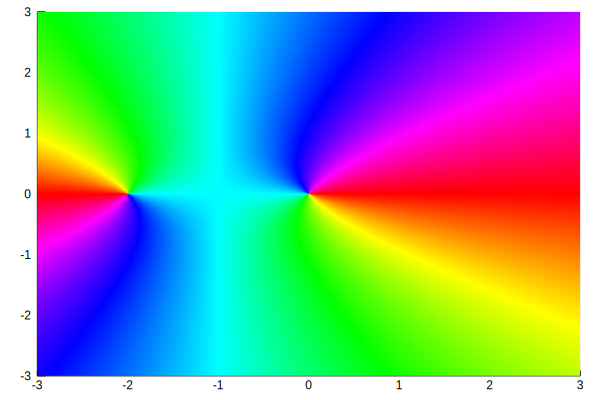

In [3]:
f = z -> 1/(z*(z+2))
phaseplot(-3..3, -3..3, f)

Because it is analytic outside a circle of radius 3 and decays like $O(z^{-2})$, its residue at infinity is zero:

In [146]:
sum(Fun(f, Circle(3.0)))

9.191214874231192e-18 - 8.870531755418961e-17im

Here's another example with singularities at $0$ and $-2$:

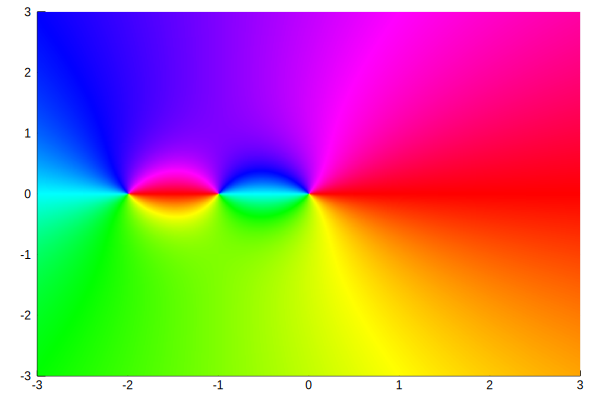

In [4]:
f = z -> 1/z + 1/(z+2)
phaseplot(-3..3, -3..3, f)

This has a residue at infinity:

In [12]:
f₋₁ = 2
res∞ = -f₋₁
sum(Fun(f, Circle(3.0))), -2π*im*res∞

(-1.7038443268502702e-15 + 12.566370614359174im, 0.0 + 12.566370614359172im)

On a smaller circle of radius 1 we pick up another term:

In [13]:
res∞ = -2
res₋₂ = 1
sum(Fun(f, Circle(1.0))), -2π*im*(res∞ + res₋₂)

(-1.032906916559743e-15 + 6.283185307179586im, 0.0 + 6.283185307179586im)

Here's a more complicated example:

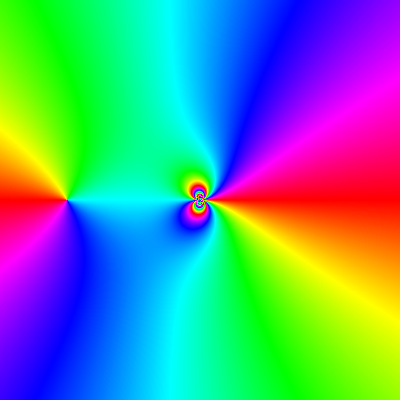

In [14]:
f = z -> exp(1/z)/(z*(z+2))
portrait(-3..3, -3..3, f)

This example has an essential singularity at zero so the classical Residue theorem is not much use, but we can use the residue theorem at infinity:

In [15]:
sum(Fun(f, Circle(3.0)))

1.2241051404579888e-18 - 1.191336987305697e-16im

In [16]:
sum(Fun(f, Circle(1.0))), -2π*im * exp(-1/2)/(-2)

(-4.3477951067425517e-16 + 1.9054722647301798im, 0.0 + 1.9054722647301798im)

## Representing analytic functions by their behaviour near singularities

A _key_ theme in complex analysis is representing functions by their behaviour near singularities.  A rather simple example of this is a side-effect of Cauchy's integral representation:

**Corollary (Cauchy's integral representation around holes)** Let $D \subset {\mathbb C}$ be a domain with $g$ holes (i.e., genus $g$). Suppose $f$ is holmorphic in and on the boundary of $D$.  Given $g$ simple closed negatively oriented contours  surrounding the holes $\gamma_1, \ldots, \gamma_g$ and a simple closed positively oriented contour $\gamma_{0}$ surrounding the outer boundary of $D$, we have
$$
f(z) = {1 \over 2 \pi i} \sum_{k=0}^{g} \oint_{\gamma_k} {f(\zeta) \over \zeta - z} d \zeta
$$

Here are two examples:

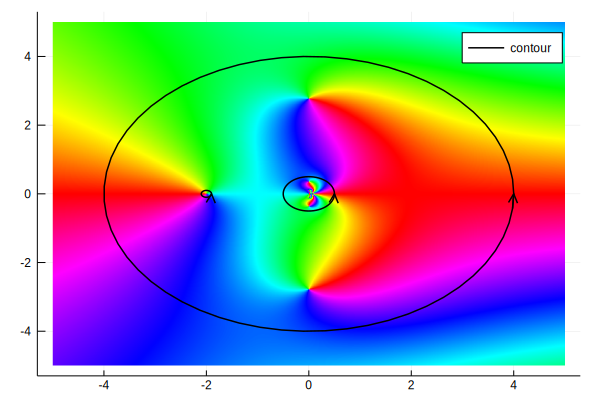

In [7]:
f = z -> (exp(1/z) + exp(z))/(z*(z+2))
Γ = Circle(0.0, 4.0) ∪ Circle(0.0,0.5,false) ∪ Circle(-2.0,0.1,false)
phaseplot(-5..5, -5..5, f)
plot!(Γ; color=:black, label=:contour, arrow=true, linewidth=1.5)

In [18]:
ζ = Fun(Γ)
z = 2.0+1.0im
sum(f.(ζ)/(ζ - z))/(2π*im)

0.8671607060038516 + 0.10261889457156087im

In [19]:
f(z)

0.8671607060038514 + 0.10261889457156062im

### Application: Partial fraction expansion

Suppose we have a rational function 
$$
r(z) = {p(z) \over q(z)}
$$
where $p,q$ are both polynomials. This is analytic everywhere apart for the roots of $q$, which we enumerate $\lambda_1,\ldots,\lambda_g$.   If we draw negatively oriented circles around each root, the previous result applies:

In [9]:
n = 7
m = 5
p = Fun(Taylor(), randn(n))
q = Fun(Taylor(), randn(m))
λ = complexroots(q)

4-element Array{Complex{Float64},1}:
  0.6574583015092604 + 0.8969475017786706im
  0.6574583015092604 - 0.8969475017786706im
 -0.6950370227626129 + 0.0im               
 -1.5131182364477396 + 0.0im               

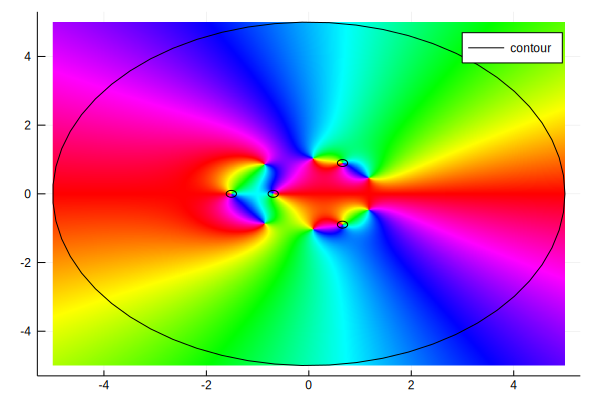

In [11]:
Γ = Circle(0.0, 5.0)
for λ in λ
    Γ = Γ ∪ Circle(λ, 0.1, false)
end
r = z -> extrapolate(p,z)/extrapolate(q,z)

phaseplot(-5..5, -5..5, r)
plot!(Γ; color=:black, label=:contour)

In [29]:
ζ = Fun(Γ)
z = 2.0+2.0im
sum(r.(ζ)/(ζ - z))/(2π*im) - r(z)

-1.6653345369377348e-16 + 2.6645352591003757e-15im

But now we can use the residue theorem to simplify the integrals! Note the following:




For example,  near the $j$th root we have the Laurent series
$$
r(z) = r_{-N_j}^j (z-\lambda_j)^{-N_j}  + \cdots + r_{-1}^j (z-\lambda_j)^{-1} + r_0 + r_1 (z-\lambda_j) + \cdots
$$
where $N_j$ is the order of the zero of $q(z)$ at $\lambda_j$.

Then it follows that
$${1 \over 2 \pi i} \oint_{\gamma_j} {r(\zeta) \over z - \zeta} d\zeta = r_{-N_j}^j (z-\lambda_j)^{-N}  + \cdots + r_{-1}^j (z-\lambda_j)^{-1}$$
for $z$ outside the contour $\gamma_j$.

Similarly, for the contour around infinity $\gamma_0$, if we have the Laurent series
$$
r(z) = \cdots + r_{-1}^0 z^{-1} + r_0^0  + r_1^0 z + \dots + r_{N_0}^0 z^{N_0}
$$
where $N_0$ is the degree of $p(z)$ divided by the degree of $q(z)$. 
Then we have
$${1 \over 2 \pi i} \oint_{\gamma_{g+1}} {r(\zeta) \over z - \zeta} d\zeta = r_0^0 + r_1^0 z + \cdots +  r_{N_0}^0 z^{N_0}.$$

Thus we have the expansion summing over the behaviour near each singularity that holds for all $z$:

$$
r(z) = \sum_{k=0}^{N_0} r_k^0 z^k  +  \sum_{j=1}^d \sum_{k = -N_j}^{-1} r_k^j (z - \lambda_j)^k
$$

*Example* When we only have simple poles and no polynomial growth at $\infty$, this has a simple form in terms of residues:

$$
r(z) = r(\infty)  +  \sum_{j=1}^d    (z - \lambda_j)^{-1} \underset{z = \lambda_j}{\rm Res}\, r(z)
$$

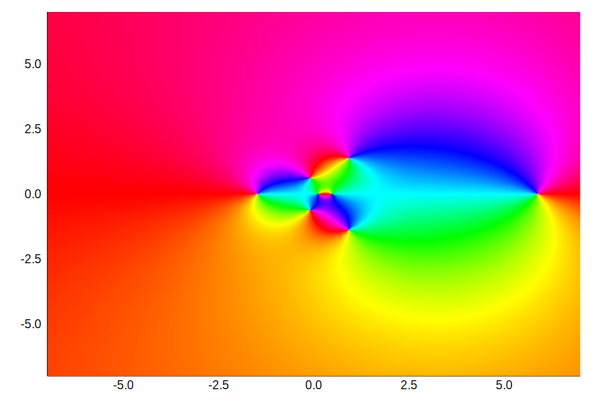

In [12]:
n = 5
m = 5
p = Fun(Taylor(), randn(n))
q = Fun(Taylor(), randn(m))
λ = complexroots(q)

r = z -> extrapolate(p,z)/extrapolate(q,z)

phaseplot(-7..7, -7..7, r)

In [13]:
res = extrapolate.(p,λ)./extrapolate.(q',λ)
r∞ = p.coefficients[n]/q.coefficients[m]

r̃ = z -> r∞ + sum(res.*(z .- λ).^(-1))

#21 (generic function with 1 method)

In [14]:
z = 0.1+0.2im
r(z) - r̃(z)

1.1102230246251565e-16 - 3.3306690738754696e-16im

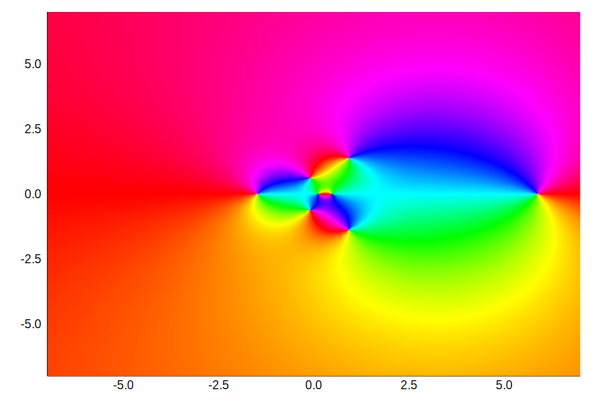

In [15]:
phaseplot(-7..7, -7..7, r̃)